In [120]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [122]:
data_path = "../data/raw_analyst_ratings.csv"
df = pd.read_csv(data_path)
print(df.head())
print(df.columns)

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [35]:
# Summary statistics
df.info()
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Preview basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
Missing values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [5]:
#Headline Analysis

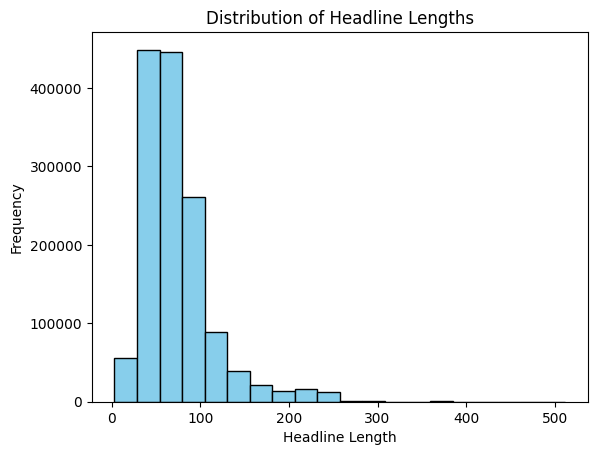

In [36]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

# Plot headline lengths
plt.hist(df['headline_length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.show()

In [7]:
print(df['date'].head())
print(df['date'].dtype)

0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object
object


In [37]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


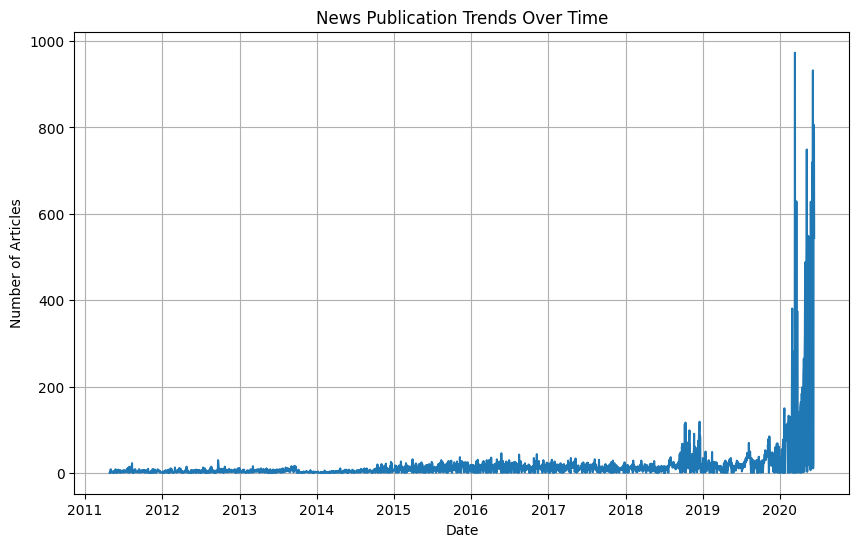

In [38]:
df['date'].dt.date.value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('News Publication Trends Over Time')
plt.grid()
plt.show()

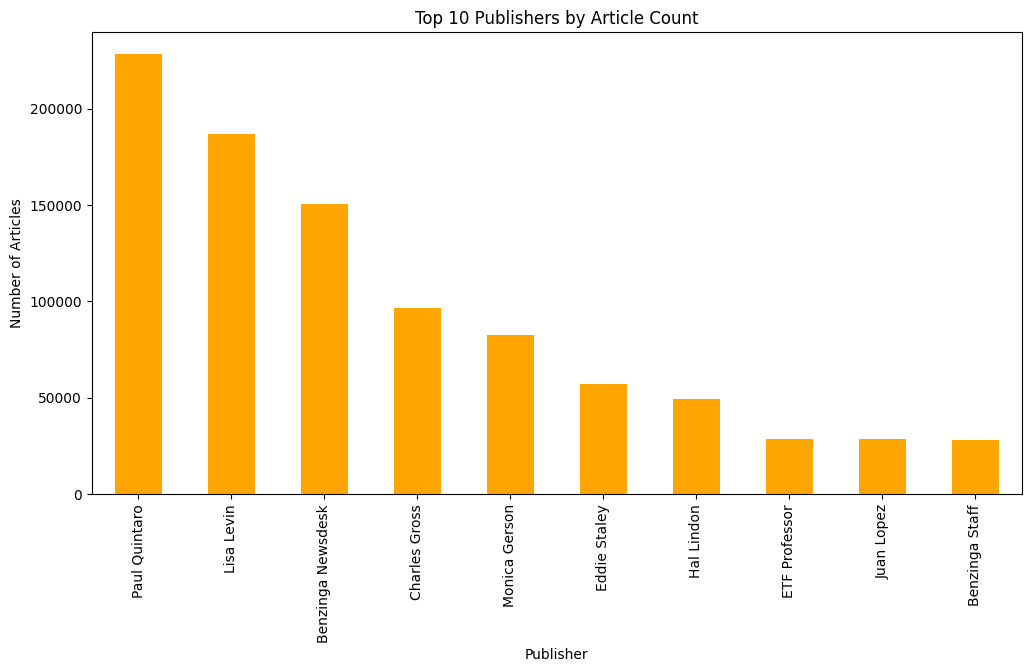

In [10]:
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()

# Top 10 publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [11]:
print(df['publisher'].value_counts())

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [12]:
#Text Analysis (Sentiment)


In [111]:
from textblob import TextBlob

df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[['headline', 'sentiment']].tail())

                                                  headline  sentiment
1407323             Top Narrow Based Indexes For August 29       0.15
1407324  Recap: Wednesday's Top Percentage Gainers and ...       0.15
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...       0.00
1407326  Oppenheimer Initiates China Zenix At Outperfor...       0.00
1407327  China Zenix Auto International Opens For Tradi...       0.00


sentiment
Neutral     934928
Positive    341161
Negative    131239
Name: count, dtype: int64


Text(0, 0.5, 'Number of Headlines')

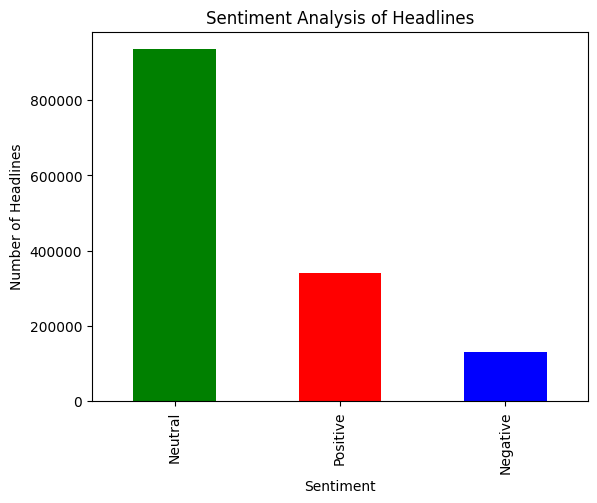

In [40]:
# Define a function to calculate sentiment
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment analysis
df['sentiment'] = df['headline'].apply(get_sentiment)

# Count sentiment categories
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Plot sentiment analysis results
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Analysis of Headlines")
plt.xlabel("Sentiment")
plt.ylabel("Number of Headlines")


In [113]:
import pandas as pd
import talib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the stock price data (make sure path is correct)
stock_data_path = "../data/TSLA_historical_data.csv"
df_stock = pd.read_csv(stock_data_path)

# Convert the 'Date' column to datetime format
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Sort data by date
df_stock = df_stock.sort_values(by='Date')

# Display basic info
print(df_stock.head())
print(df_stock.info())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3545 non-null   datetime64[ns]
 1   Open          3545 non-null   float64       
 2   High          3545 non-null   float64       
 

In [114]:
# Calculate daily percentage returns
df_stock['Daily_Return'] = df_stock['Close'].pct_change()

# Print summary statistics for daily returns
print("Summary of Daily Returns:")
print(df_stock['Daily_Return'].describe())


Summary of Daily Returns:
count    3544.000000
mean        0.002035
std         0.035871
min        -0.210628
25%        -0.016076
50%         0.001223
75%         0.019257
max         0.243951
Name: Daily_Return, dtype: float64


In [115]:
# Convert 'Close' column to a NumPy array for TA-Lib functions
close_prices = df_stock['Close'].to_numpy()

# Calculate Simple Moving Average (SMA) over 20 days
df_stock['SMA_20'] = talib.SMA(close_prices, timeperiod=20)

# Calculate Relative Strength Index (RSI)
df_stock['RSI'] = talib.RSI(close_prices, timeperiod=14)

# Calculate Moving Average Convergence Divergence (MACD)
df_stock['MACD'], df_stock['MACD_signal'], df_stock['MACD_hist'] = talib.MACD(
    close_prices, fastperiod=12, slowperiod=26, signalperiod=9
)

# Display the calculated indicators
print(df_stock[['Date', 'Close', 'SMA_20', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].head())
print(df_stock[['Date', 'Close', 'SMA_20', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].tail())


        Date     Close  SMA_20  RSI  MACD  MACD_signal  MACD_hist
0 2010-06-29  1.592667     NaN  NaN   NaN          NaN        NaN
1 2010-06-30  1.588667     NaN  NaN   NaN          NaN        NaN
2 2010-07-01  1.464000     NaN  NaN   NaN          NaN        NaN
3 2010-07-02  1.280000     NaN  NaN   NaN          NaN        NaN
4 2010-07-06  1.074000     NaN  NaN   NaN          NaN        NaN
           Date       Close      SMA_20        RSI       MACD  MACD_signal  \
3540 2024-07-24  215.990005  237.924999  44.886918  11.789291    15.873789   
3541 2024-07-25  220.250000  239.118999  46.951389   9.353206    14.569672   
3542 2024-07-26  219.800003  240.238000  46.752165   7.302106    13.116159   
3543 2024-07-29  232.100006  241.949000  52.664511   6.593101    11.811547   
3544 2024-07-30  222.619995  242.587000  48.220474   5.206237    10.490485   

      MACD_hist  
3540  -4.084498  
3541  -5.216466  
3542  -5.814053  
3543  -5.218447  
3544  -5.284248  


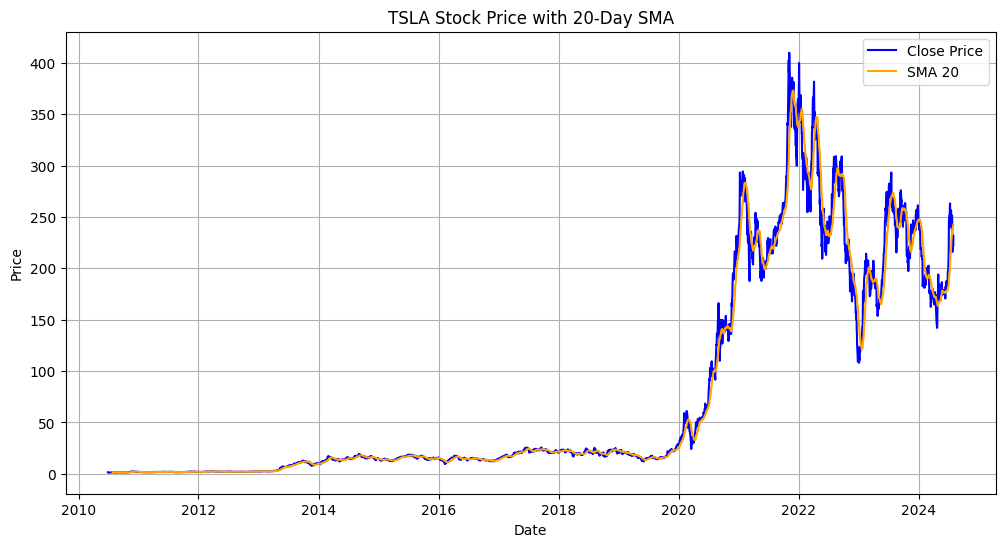

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Date'], df_stock['Close'], label='Close Price', color='blue')
plt.plot(df_stock['Date'], df_stock['SMA_20'], label='SMA 20', color='orange')
plt.title('TSLA Stock Price with 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


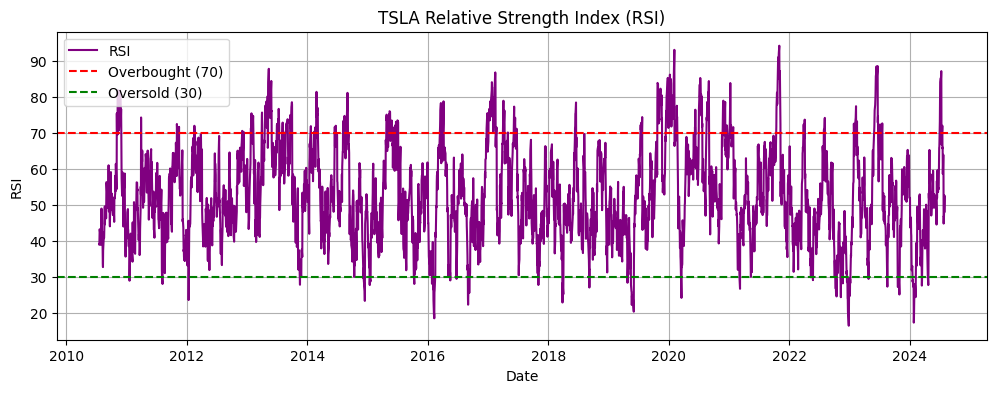

In [117]:
plt.figure(figsize=(12, 4))
plt.plot(df_stock['Date'], df_stock['RSI'], color='purple', label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('TSLA Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()


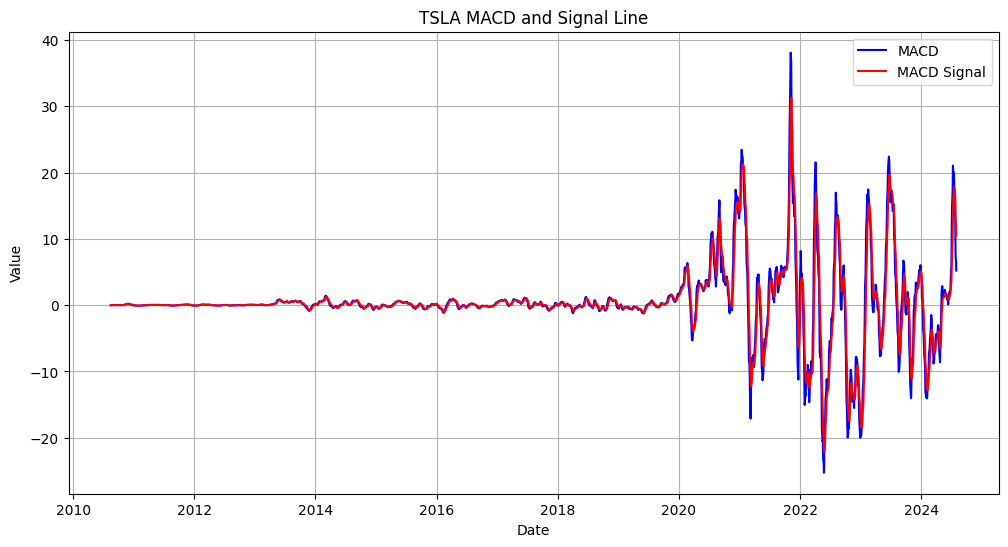

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Date'], df_stock['MACD'], label='MACD', color='blue')
plt.plot(df_stock['Date'], df_stock['MACD_signal'], label='MACD Signal', color='red')
plt.title('TSLA MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


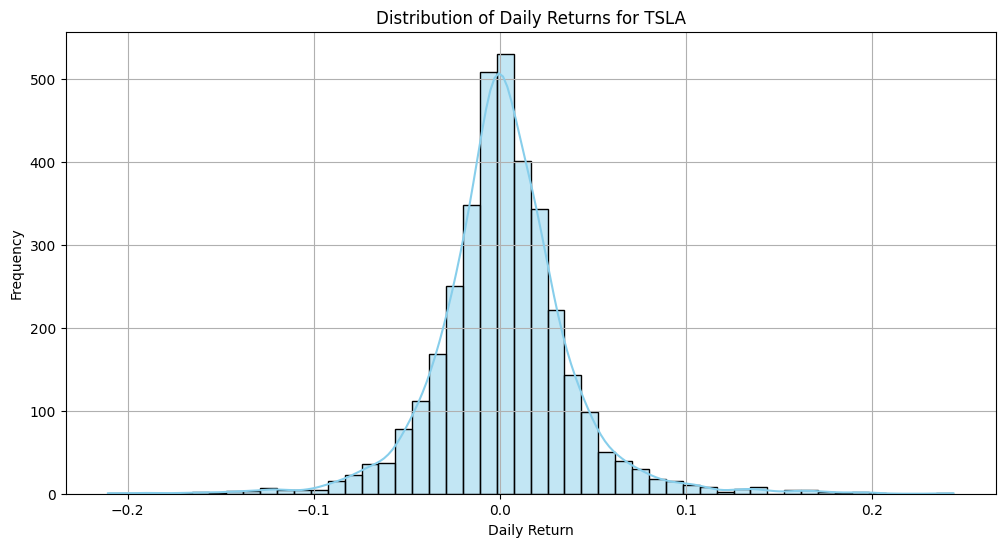

In [119]:
plt.figure(figsize=(12, 6))
sns.histplot(df_stock['Daily_Return'].dropna(), bins=50, color='skyblue', kde=True)
plt.title('Distribution of Daily Returns for TSLA')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()
